모집단의 분포, 표본의 분포를 보고 이게 경향이 비슷할 거라고 생각해야<br>
추정을 할 수 있는 거지. 이것이 바로 [추측 통계학]<br>
전체 평균을 보고서 개인의 값을 예측하는 것.<br>

In [1]:
import numpy as np
import pandas as pd

# 1차원 데이터
- 평균값(기댓값), 표본분산(표본집단에서 값들이 표본평균으로부터 얼마나 퍼져 있는지),<br>
    불편분산(자유도로 구분. ddof=1), 표준편차<br>
<br>
- 표본분산은 표본의 평균을 사용해 분산을 계산한 값으로,<br>
    분산을 과소 추정하는 경향이 있으며, 그 경향을 없애기 위한 것이 불편분산.<br>
    따라서 불편분산은 표본분산보다 조금 큰 값이 된다.<br>
<br>
- 표준화: 평균값이 큰 변수와 작은 변수가 섞여 있으면(scale이 다르면) 데이터를 다루기 어려우므로<br>
    표준화를 통해 데이터를 다루기 쉽게 한다.<br>
<br>
- 최댓값, 최솟값, 중앙값, 사분위수<br>
<br>
- 표본분산과 비편향분산
    - 분산은 표본분산과 불편분산(unbiased variance)의 두 종류가 존재
    - 표본분산은 표본에서 계산된 분산이며,<br>
        모집단에 비해 표본 수가 적을 때에는 표본분산이 모분산보다 작아진다.
    - 즉, 표본분산을 모집단 분산에 맞춰서 동일하게 보정한 것을 '비편향분산'이라 한다.
    - 통계학에서는 이 비편향분산을 사용하는 경우가 많다.
    - 불편분산은 n 대신 n-1로 나누어 구할 수 있다.
<br>

## [표본분산이 분산을 과소평가하는 이유]
### 호수 안에 물고기가 7마리 있다.<br>
몸 길이 {1,2,3,4,5,6,7} -> 모평균 4<br>
샘플링 3마리 {1,2,3} -> 표본평균 2<br>
샘플링 4마리 {1,2,6,7} -> 표본평균 4<br>
샘플링만 알고 있을 때 우리는 모평균을 모른다.<br>
이 때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며<br>
분산을 과소평가하게 된다.<br>
거리 계산이지 값 계산이 아니기 때문에 어쨌든 중앙값에서 떨어지는 거리는<br>
전체 모집단에서 보는 평균에서의 거리보다는 짧게 나온다는 것임.<br>
모평균에서의 분산보다 표본평균에서의 분산값이 더 작게 나온다는 것.<br>
<br>
일부는 모평균, 모분산과 유사값이 나올 수 있겠지만<br>
그렇지 않은 나머지 집단들(더 적거나 편향된 샘플들)이 많기 때문에<br>
결과적으로는 모집단보다는 표본의 분산값들이 작게 나올 수밖에 없음.<br>
<br>
표본분산보다 조금 더 큰 값이 되도록 보정한 것이 (모분산을 추정하기 위한)불편분산이며,<br>
분모를 n 대신 n-1로 나누는 것이다.<br>
https://m.blog.naver.com/ao9364/222023124818<br>
https://m.blog.naver.com/sw4r/221021838997<br>
내용 보면 우리가 이렇게 하는 건 최종적으로 전체적인 모집단의 값을 추측하기 위한 것임<br>
기댓값이 실제보다 적게 나오는 경향이 있으니, 편향성을 배제한 불편분산을 만들어 주는 것.

일단 헷갈리지 않게 자유도 다 붙여주자.<br>
넘파이에서 분산 구할 때만 기본적으로 표본분산을 출력해 주는데<br>
실사용할 때 헷갈려서 망하면 어떡하니?<br>
그러니까 자유도는 다 붙여주기!

어느 통계 책이든 시작할 적에 이러한 예시를 들 것임.<br>
전 국민 몸무게를 알고 싶다.<br>
근데 지금 내가 가진 건 우리 학교 학생들의 몸무게 데이터뿐이다.<br>
그럼 이걸(표본집단) 갖고 전국민 몸무게(모집단)를 추측할 수 있게 하는 것이<br>
이 통계라는 학문의 궁극적 목표인 것임.<br>
우리는 데이터를 정제해서 경향을 파악하고 일반화해서 상용화하는 게 목적임.<br>
그걸 위해서 모집단을 추정할 수 있어야 하는 거라고!!!!!!!!!!!!!!<br>

In [2]:
# 표본분산과 불편분산(비편향분산) 구해 보기
data = np.array([2,3,3,4,4,4,4,5,5,6])
mu = data.sum()/len(data) # 평균
# 편차 제곱의 합을 n 또는 n-1로 나누면 표본분산 또는 불편분산이 나온다.
s = np.sum((data-mu)**2)/len(data) # 표본분산. n으로 나누었다.
s1 = np.sum((data-mu)**2)/(len(data)-1) # 불편분산. n-1로 나누었다.
display(s,s1)
# 검증해 봅시다. 순서대로 표본분산, 불편분산.
display(np.var(data), np.var(data,ddof=1))

1.2

1.3333333333333333

1.2

1.3333333333333333

In [3]:
df = pd.read_csv('./data/ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [4]:
scores = np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [5]:
score_df = pd.DataFrame({'score':scores},
                       index = 
                        pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                       name = 'student'))
score_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [6]:
# 평균값
print(sum(scores)/len(scores))
print(np.mean(scores), scores.mean())
print(score_df.mean())

55.0
55.0 55.0
score    55.0
dtype: float64


In [7]:
# 중앙값
sorted_scores = np.sort(scores)
print(sorted_scores)
if len(sorted_scores)%2==1: # 집단이 홀수 개일 때
    n = sorted_scores[len(sorted_scores)//2+1]
else: # 집단이 짝수 개일 때
    n1 = sorted_scores[len(sorted_scores)//2-1]
    n2 = sorted_scores[len(sorted_scores)//2]
    n = (n1+n2)/2
print(n)

print(np.median(scores))
print(score_df.median())

[41 42 48 49 56 57 58 65 65 69]
56.5
56.5
score    56.5
dtype: float64


In [8]:
# 최빈값
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [9]:
# 분산과 표준편차
mean = np.mean(scores)
print(mean)
deviation = scores - mean
print(deviation)
# 편차를 다 더하면 0이 나온다.
# 편차란 요소값과 평균간의 거리.
# 분산은 편차 제곱의 평균

55.0
[-13.  14.   1. -14.   2.  -7.  10.  -6.  10.   3.]


In [10]:
np.mean(deviation) # 합이 0이니 평균도 0일 수밖에

0.0

In [11]:
# [연습문제] 20개 원소로 구성되는 배열을 만든 후
# 평균, 편차 및 편차의 합을 구하세요.
ar = np.random.randint(1,30,20)
np.random.seed(0)
# 평균
print(ar)
print(np.mean(ar))
# 편차
devi = ar - np.mean(ar)
print(devi)
# 편차의 합
print(np.sum(devi))

[14 10  8 10 14 16  6  8  2 25  8 15 26 18 18  1 14 26 10 16]
13.25
[  0.75  -3.25  -5.25  -3.25   0.75   2.75  -7.25  -5.25 -11.25  11.75
  -5.25   1.75  12.75   4.75   4.75 -12.25   0.75  12.75  -3.25   2.75]
0.0


<AxesSubplot:>

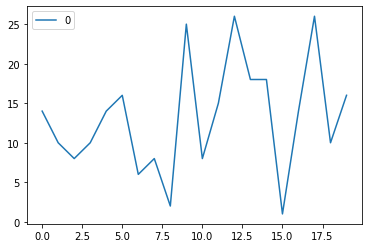

In [12]:
adf = pd.DataFrame(ar)
adf.plot()

## 분산
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산
  * Numpy는 표본분산, Pandas는 불편분산(편향이 없는 분산)
  * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof = 0 이라고 설정,<br>
      불편분산은 ddof = 1일 때 해당됨.<br>
- 일반적으로 우리가 생각하는 분산은 표본분산.<br>
    불편분산을 좀 더 심도 있게 이해해야 헷갈리지 않음.<br>
    불편분산은 표본분산보다 값이 조금 더 커서, 모분산과의 격차를 줄인 것임
-두 방식의 차이가 뭐냐, 자유도(degree of freedom)의 차이임.<br>

In [13]:
# 위에서 구했던 성적의 편차를 제곱하고 평균을 내보자.
# 앞서 말했듯 분산은 편차 제곱의 평균임.
print(np.mean(deviation ** 2))
# 표본분산도 알아보자.
print(np.var(scores))

86.0
86.0


In [14]:
# pandas로 구해보자.
print(score_df.var())
# 값이 다르다. 불편분산으로 계산했기 때문이다.
# 일반적인 분산의 개념은 위의 numpy의 표본분산이다.
# 값의 정확도는 불편분산이 더 좋음. 모집단의 분산을 추정하기엔 이게 더 유리하단 뜻

score    95.555556
dtype: float64


In [15]:
df1 = score_df.copy()
df1['deviation'] = deviation
df1['square of deviation'] = np.square(deviation) # deviation**2
display(df1,df1.mean())

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [16]:
# 표준편차를 구해보자
# sqrt는 루트 씌우는 것임
# 표준편차는 분산의 루트값
# 편차 제곱의 평균이 분산 ->  그 분산의 루트가 표준편차
np.sqrt(np.var(scores,ddof=0))
# 자유도가 0인 표본분산을 이용해 표준편차 구하기

9.273618495495704

In [17]:
# 함수를 써서 표준편차를 구한다면?
np.std(scores, ddof=0)
# 표본분산으로 구한 표준편차.
# 기본값이 ddof=0이기 때문에 생략해도 되는데 일단 써봤음

9.273618495495704

In [18]:
# 불편분산에 기반한 표준편차를 구한다면?
display(np.sqrt(np.var(scores,ddof=1)),
       np.std(scores, ddof=1))

9.775252199076787

9.775252199076787

In [19]:
# pandas 기본값은 불편분산
display(df1.std())
# 표본분산으로 하고 싶다면?
df1.std(ddof=0)

score                   9.775252
deviation               9.775252
square of deviation    78.335461
dtype: float64

score                   9.273618
deviation               9.273618
square of deviation    74.315543
dtype: float64

In [20]:
# 범위와 4분위수 범위
# 범위: 가장 큰 수와 가장 작은 수의 차이(최댓값-최솟값)
display(np.max(scores)-np.min(scores))
# 4분위 구하기
sQ1 = np.percentile(scores,25) # 1사분위
sQ3 = np.percentile(scores,75) # 3사분위
iqr = sQ3-sQ1
display(sQ1,sQ3,iqr)

28

48.25

63.25

15.0

In [21]:
# 배열의 통계요약표를 보려면
# 시리즈로 바꿔주면 pandas에서 먹힌다!
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [22]:
# 데이터 정규화
print(f'''평균: {scores.mean()},
표준편차: {scores.std().round(4)}''')

평균: 55.0,
표준편차: 9.2736


In [23]:
# 표준화 하기 - z_score 이용
z = (scores-scores.mean())/scores.std()
display(z,z.mean(), z.std())
# 표준화했기 때문에 평균이 0, 표준편차가 1인 정규분포의 형태로 바뀐다.

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

-1.6653345369377347e-17

0.9999999999999999

In [24]:
z1 = 50+10*z
z1

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [25]:
score_df['deviation_value'] = z1
score_df
# 이 컬럼을 왜 만들었는지 잘 모르겠음...
# 동일한 분포를 가진(균일분포) 데이터를 말한 거 같은디

,score,deviation_value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [26]:
eng_scores = np.array(df.english)
pd.Series(eng_scores).describe()
# 영어 공부 좀 하자 얘들아

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [27]:
display(np.percentile(eng_scores,25),np.percentile(eng_scores,75))
# 위의 통계요약표에 나온 것과 값이 같다잉~

54.0

65.0

In [28]:
# 도수 분포표를 만들어 볼까용?
freq, _ = np.histogram(eng_scores, bins=10, range=(0,100))
freq
# np.histogram 함수를 쓰면 값 2개가 반환되는데
# 그 중 앞의 값만 취한 것이 빈도임
# 사실 뒤의 값은 100의 범위를 10의 bins로 나눈 것들의 목록이라
# 중요하진 않음,,,

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [29]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq},
                           index=pd.Index(freq_class, name='class'))
freq_dist_df
# 히스토그램 그린 걸 표로 바꾼 거나 마찬 가지임

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [30]:
# 계급값: 각 계급을 대표하는 값으로 계급의 중앙값
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value
# 각 계급(0~10, 10~20 등등)의 중앙값들을 구해보았다.

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [31]:
# 상대도수(relative frequency): 해당 계급의 데이터의 상대적인 비율
# 도수는 즉 빈도수 라고 생각하자.
rel_freq = freq/freq.sum()
rel_freq
# 빈도를 상대적인 수치화한 것임
# 비율이기 때문에 총합은 1이다. 상대적인 비율임

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [32]:
# 누적상대도수: 해당 계급까지의 상대도수의 합을 누적한 것
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [33]:
freq_dist_df['class value'] = class_value # 중앙값
freq_dist_df['relative frequency'] = rel_freq # 상대도수
freq_dist_df['cumulative relative frequency'] = cum_rel_freq # 누적상대도수
freq_dist_df

,frequency,class value,relative frequency,cumulative relative frequency
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


In [34]:
# 각 칼럼에서의 최빈값
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']
# idxmax, idxmin 함수는 칼럼 내에서 최댓값, 최솟값의 인덱스를 알려줌
# 그러면 frequency의 값이 최대 또는 최소인 인덱스 값을 가지는 행의 값을
# 열 조건 컬럼에 맞춰서 출력해주는 원리임

65

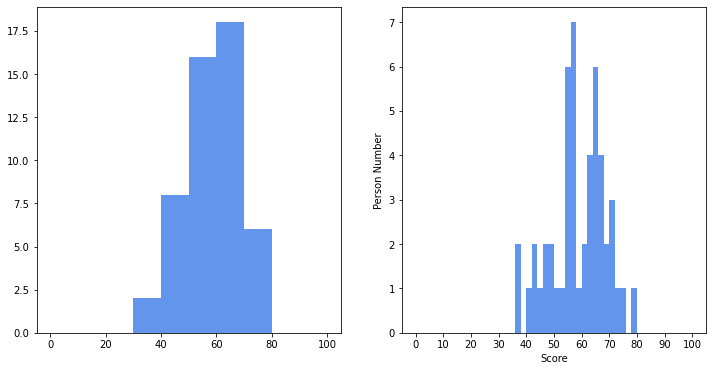

In [63]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121) # 1,2,1이랑 같은 말임
ax2 = fig.add_subplot(122)
freq,_,_ = ax1.hist(eng_scores,bins=10,range=(0,100),
                   color='cornflowerblue')
freq,_,_ = ax2.hist(eng_scores,bins=50,range=(0,100),
                   color='cornflowerblue')
# 3가지 값이 나오는데 거기서 첫 번째 값만 freq에 저장해서 쓸 거임
# 나머진 필요 없어서 변수 선언 안 함
# 두 번째 값은 걍 1칸이 10인 배열이고 세 번째는 바 형태의 10개 짜리 무엇이란 뜻이라서
# 별로 필요하진 않은 값이라 맨 앞의 것만 챙긴 거임
ax1.set_xlabel('Score')
ax1.set_ylabel('Person Number')
ax1.set_xticks(np.linspace(0,100,10+1))
ax1.set_yticks(np.arange(0,freq.max()+1))
ax2.set_xlabel('Score')
ax2.set_ylabel('Person Number')
ax2.set_xticks(np.linspace(0,100,10+1))
ax2.set_yticks(np.arange(0,freq.max()+1))
plt.show()
plt.close()

# 계급은 가로축 각 1칸씩. 중앙값은 그 가운데
# 상대도수는 person number(frequency)를 frequency의 총합으로 나눈 것
# 범주화 할 때 범주의 크기도 중요함. bins 값에 변화를 줬을 때
# 히스토그램 모양이 바뀐다.
# 따라서 어떻게 했을 때 데이터가 가장 합리적인지 생각했을 때 그 근거가 있어야 함.

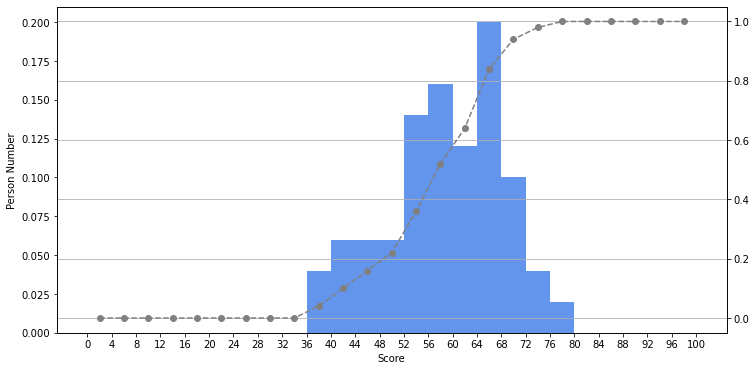

In [36]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(111) # 1,1,1이랑 같은 말임
# y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성해 보자.
# 그러려면 y축을 2종류로 사용해야 함.
ax2 = ax1.twinx()
weights = np.ones_like(eng_scores)/len(eng_scores)
# weight의 의미?
# 상대도수의 히스토그램으로 만들기 위해서는
# 도수를 데이터의 수로 나눠야 함
rel_freq,_,_ = ax1.hist(eng_scores,bins=25,range=(0,100),
                        weights=weights, color='cornflowerblue')
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]
# 클래스 밸류는 x열이며, 각 칸의 중앙값을 1칸으로 한다

ax2.plot(class_value, cum_rel_freq, ls='--',marker='o',color='gray')
ax2.grid(visible=True)

ax1.set_xlabel('Score')
ax1.set_ylabel('Person Number')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()
plt.close()

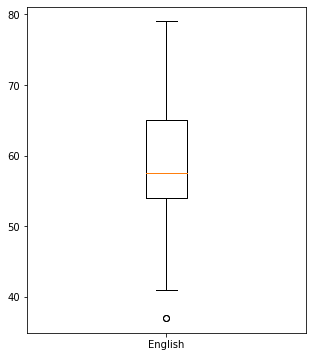

In [37]:
# box plot(상자그림)
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(eng_scores,labels=['English'])
plt.show()
plt.close()

## 2차원 데이터


In [38]:
df = pd.read_csv('./data/ch2_scores_em.csv',index_col='student number')

en_scores = np.array(df.english)[:10]
mt_scores = np.array(df.mathematics)[:10]
sdf = pd.DataFrame({'english':en_scores,
                   'mathematics':mt_scores},
                  index = 
                        pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                       name = 'student'))
sdf

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [39]:
# 공분산 - 두 개 이상의 집단에 대하여 의존성을 확인한다.
dfc = sdf.copy()
dfc['eng_deviation'] = dfc.english-dfc.english.mean()
dfc['math_deviation'] = dfc.mathematics-dfc.mathematics.mean()
dfc['product of deviation'] = dfc['eng_deviation']*dfc['math_deviation']
dfc

,english,mathematics,eng_deviation,math_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [40]:
dfc['product of deviation'].mean() # 이게 공분산임
# 편차 곱의 평균.
# 두 개의 편차가 같은 경향을 가지는지 보는 것임
# 두 개의 편차를 곱했을 때 양의 값이 나온다면 같은 방향,
# 음의 방향이 나온다면 다른 방향

62.8

In [41]:
cov_mat = np.cov(en_scores,mt_scores,ddof=0) # 표본분산으로 계산해보자
cov_mat
# [0,1]과 [1,0] 부분의 값이 편차 곱의 평균과 같은 값이 나온다.
# 왜냐면 [0,0]과 [1,1]은 같은 애들이니까
a = (dfc.eng_deviation**2).mean() # 자기자신의 공분산
b = round((dfc.math_deviation**2).mean(),2)
display(cov_mat,a,b)

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

86.0

68.44

np.cov 함수는 공분산 값을 리턴하는 게 아니라 공분산행렬을 반환한다.<br>
1행 1열은 eng 자기 자신의 공분산 즉, eng 의 분산값을<br>
2행 2열은 math 자기 자신의 공분산 즉, math의 분산값을 반환한다.<br>
따라서 1행 2열 그리고 2행 1열만 두 변수의 공분산을 반환한다.<br>

In [42]:
np.var(en_scores, ddof=0), np.var(mt_scores,ddof=0).round(2)

(86.0, 68.44)

In [43]:
# 상관계수
cov = np.cov(en_scores, mt_scores,ddof=0)[0,1] # [1,0]도 됨~
cov/(np.std(en_scores)*np.std(mt_scores))
# 근데 저게 집단이 커지고 비교할 것도 많아지면 더 어려워지겠지?
# 그래서 0과 1사이의 상관계수로 바꿔서 직관적으로 보자는 것임
# 0이 제일 노상관, 1이 제일 상관

0.8185692341186713

In [44]:
# 상관계수를 행렬식으로 나타내 보자
# correlation, coefficient
np.corrcoef(en_scores, mt_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [45]:
sdf.corr() # 숱하게 봐오던 바로 그것이다...

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


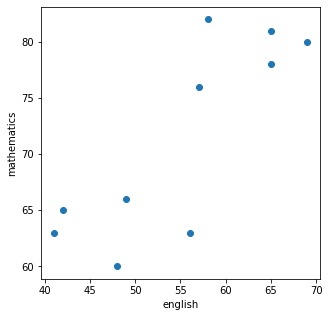

In [46]:
# 산점도 봐볼까?
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(sdf.english, sdf.mathematics)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
plt.show() # 이거 하면 윗줄에 머시기 문구 안 나옴.
plt.close() # 이거 하면 메모리에서 지워져서 해주는 거임.

[ 0.62142302 42.60132433]  
0.6214 x + 42.6


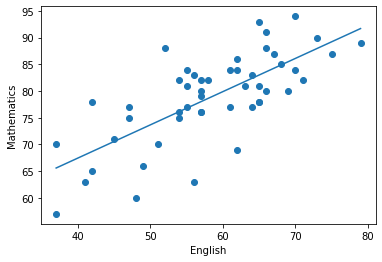

In [60]:
# 회귀직선
eng_scores = np.array(df.english)
math_scores = np.array(df.mathematics)

# 계수 구하기 (회귀직선 y = ax+b)
poly_fit = np.polyfit(eng_scores, math_scores, 1) # 직선이기 때문에 1차방정식
poly_1d = np.poly1d(poly_fit)
print(poly_fit, poly_1d)
# 폴리핏의 0번째 인덱스가 기울기, 1번째 인덱스가 y절편
# 폴리핏으로 구한 계수로 폴리1d 1차 방정식 완성

# 구한 계수로 그래프 그리기
xs = np.linspace(eng_scores.min(),eng_scores.max())
ys = poly_1d(xs)
plt.figure(figsize=(6,4))
plt.scatter(eng_scores, math_scores)
plt.plot(xs,ys)
plt.xlabel('English')
plt.ylabel('Mathematics')
plt.show()
plt.close()

1. ax. 해서 실행 되는 사람 -> 바로 위 산점도에서 ax를 선언함
	- plt.close()는 변수 선언과 무관.
2. twinx()로 한 ax안에 plot 하면 가능
3. 다른 grid에 그린 것은 각각 설정 해줘야 작동


<AxesSubplot:xlabel='english', ylabel='mathematics'>

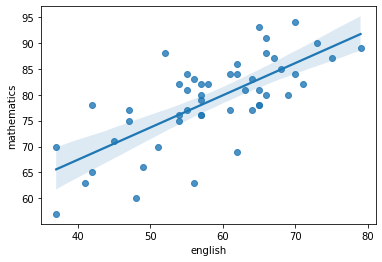

In [97]:
# seaborn을 이용한 회귀직선 그리기
import seaborn as sns
import warnings ; warnings.filterwarnings('ignore')
sns.regplot(df.english,df.mathematics,df,fit_reg=True)
# sns.regplot('english','mathematics',df,fit_reg=True) 이렇게도 됨

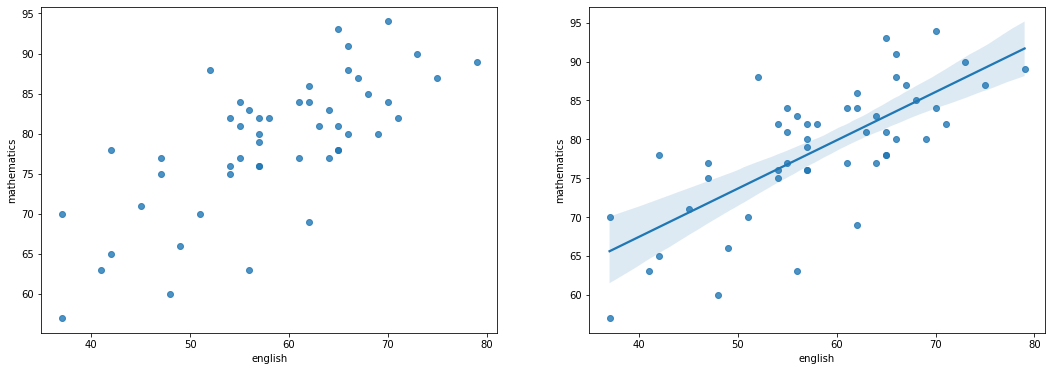

In [103]:
fig, axes = plt.subplots(1,2,figsize=(18,6), sharex=True)
sns.regplot(ax=axes[0], x=df.english, y=df.mathematics,fit_reg=False)
sns.regplot(ax=axes[1], x=df.english, y=df.mathematics)
plt.show()
plt.close()

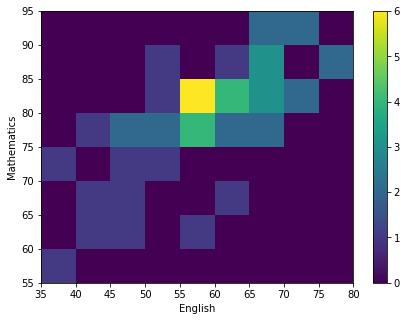

(array([[1., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 1., 0., 1., 0., 0., 0.],
        [0., 1., 1., 1., 2., 0., 0., 0.],
        [0., 0., 0., 1., 2., 1., 1., 0.],
        [0., 1., 0., 0., 4., 6., 0., 0.],
        [0., 0., 1., 0., 2., 4., 1., 0.],
        [0., 0., 0., 0., 2., 3., 3., 2.],
        [0., 0., 0., 0., 0., 2., 0., 2.],
        [0., 0., 0., 0., 0., 0., 2., 0.]]),
 array([35., 40., 45., 50., 55., 60., 65., 70., 75., 80.]),
 array([55., 60., 65., 70., 75., 80., 85., 90., 95.]),
 <matplotlib.collections.QuadMesh at 0x21385888e80>)

In [110]:
# 히트맵 - hist2d 메소드로 히트맵 작성
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

c = ax.hist2d(eng_scores, math_scores, # 2차원 히스토그램 = 히트맵?
             bins=[9,8], range=[(35,80),(55,95)]) # bins가 계급의 개수
ax.set_xlabel('English')
ax.set_ylabel('Mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3], ax=ax)
plt.show()
plt.close()
display(c)

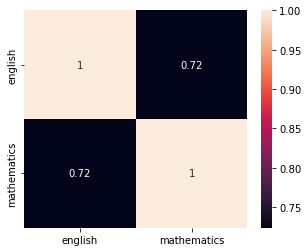

In [116]:
# [연습문제] english와 mathematics 두 변수의 상관관계를 히트맵으로 표현하세요.
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),annot=True) # annot은 각 셀의 셀값 표시 여부
plt.show()
plt.close()

## 다항곡선 회귀분석
https://qlsenddl-lab.tistory.com/48


In [120]:
anscombe_data = np.load('./data/ch3_anscombe.npy')
anscombe_data.shape # 11행 2열짜리 배열이 4겹
anscombe_data[0] # 인덱스가 0일 적의 첫 번째 장

array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [125]:
# 아래 인덱스 항목을 지니는 데이터 프레임을 만들어 보자.

stats_df = pd.DataFrame(index = ['X_mean','X_variance','Y_mean','Y_variance',
                                 'X&Y_correlation','X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:,0] # i번째 장의 첫째 열
    dataY = data[:,1] # i번째 장의 둘째 열
    poly_fit = np.polyfit(dataX,dataY,1)
    stats_df[f'data {i+1}'] = [f'{np.mean(dataX):.2f}',
                             f'{np.var(dataX):.2f}',
                             f'{np.mean(dataY):.2f}',
                             f'{np.var(dataY):.2f}',
                             f'{np.corrcoef(dataX,dataY)[0,1]:.2f}',
                             f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data 1,data 2,data 3,data 4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


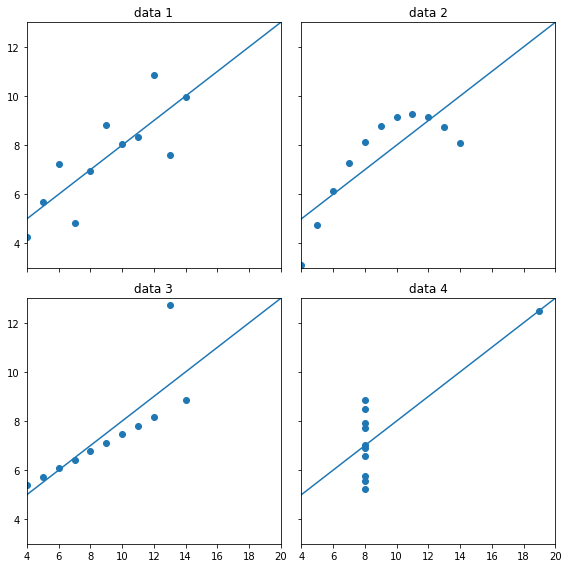

In [130]:
# 그걸로 그래프도 그려보자.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8),
                        sharex=True, sharey=True) # x축, y축 모두 share 하겠다
xs = np.linspace(0,30,100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0],data[:,1],1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    ax = axes[i//2, i%2] # 인덱스 위치를 수식으로 나타낸 것임.i는 0, 1, 2, 3까지만 있음.
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    ax.set_title(f'data {i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs,ys)

# 간격 좁히기
plt.tight_layout()
plt.show()
plt.close()

데이터 해석<br>
현재 앤스컴 배열의 1겹 1겹을 그림으로 그려본 것임.<br>
이 4장의 11행 2열 데이터의 기술통계량의 수치는 모두 동일함.<br>
상관계수와 회귀직선이 똑같은 4개의 데이터인데도 데이터의 분포 모양이 다 다르다.<br>
제일 이상적인 모양은 사실 1번째임.<br>
3번째가 왜 아니냐 하면, 범주가 너무 다른 이상치가 존재하기 때문임.<br>

In [131]:
# [연습문제] species 그룹별 통계량을 구하세요.
fdf = pd.read_csv('./data/5_2_fm.csv')
fdf.groupby('species').describe()


length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

In [87]:
# [연습문제] 각 store의 컬러별 판매량을 파악할 수 있는 피벗 테이블을 작성하세요.
sdf = pd.read_csv('./data/5_2_shoes.csv')
sdf.pivot('store','color','sales')

color,blue,red
store,,
osaka,13,9
tokyo,10,15


In [134]:
sdf1 = pd.pivot_table(sdf,
                     index = 'store', # 행 위치에 들어갈 열
                     columns = 'color', # 열 위치에들어갈 열
                     values = 'sales', # 데이터로 사용 할 열
                     aggfunc = 'sum') # 데이터 집계 함수. 여기선 빼도 동작함
sdf1

color,blue,red
store,,
osaka,13,9
tokyo,10,15


In [137]:
sdf.pivot_table(index=['store','color'],values='sales',aggfunc='sum')

sales
store color       
osaka blue      13
      red        9
tokyo blue      10
      red       15

In [139]:
# [연습문제] x, y의 공분산과 상관행렬을 구하세요.
cdf = pd.read_csv('./data/4_cov.csv')
display(cdf.cov().iloc[0,1].round(2), cdf.corr().round(2))

7.67

,x,y
x,1.00,0.76
y,0.76,1.00


In [ ]:
# [과제] 1변량(1차원) 데이터 data에 대하여 기술하여라
# 평균, 분산(표본분산, 불편분산), 표준편차, 최댓값, 최솟값, 4분위수,
# 중앙값 을 구하여 출력하기.
# 단, 함수를 사용하는 경우와 사용하지 않는 경우로 나누어 표기할 것
# 계산식을 알아야 하니까~

data = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])
# ===== 함수를 사용하지 않고 =====
# 평균
a = sum(data)/len(data)
print(f'평균: {a}')
# 표본분산, 불편분산
b1 = sum((data-a)**2)/len(data)
b2 = (sum((data-a)**2)/(len(data)-1)).round(2)
print(f'''표본분산: {b1}
불편분산: {b2}''')
# 표준편차
print(f'''표본분산을 이용한 표준편차: {round(b1**0.5,2)}
불편분산을 이용한 표준편차: {round(b2**0.5,2)}''')
# 최댓값, 최솟값
print(f'''최댓값: {sorted(data)[-1]}
최솟값: {sorted(data)[0]}''')
# 4분위수와 IQR
print(f'''1분위수: {np.percentile(data,25)}
2분위수: {np.percentile(data,50)}
3분위수: {np.percentile(data,75)}
IQR: {np.percentile(data,75)-np.percentile(data,25)}''')
# 이거 퀀타일 안 쓰고 구할 수는 있는 거셈..?
# 나는 모르겠다......................
# 생산성이 없어서 스킵함 ㅋㅋㅋ 개념만 이해하고

# 중앙값
srt = sorted(data)
if len(srt)%2 ==0:
    n1 = srt[len(srt)//2]
    n2 = srt[len(srt)//2-1]
    n = (n1+n2)/2
else: n=srt[len(srt)//2]
print(f'중앙값: {n}')

print()
# ===== 함수를 사용하고 =====
# 평균
print(f'평균: {data.mean()}')
# 표본분산, 불편분산
print(f'''표본분산: {np.var(data)}
불편분산: {np.var(data, ddof=1).round(2)}''')
# 표준편차
print(f'''표본분산을 이용한 표준편차: {np.sqrt(np.var(data)).round(2)}
불편분산을 이용한 표준편차: {np.sqrt(np.var(data,ddof=1)).round(2)}''')
# 최댓값, 최솟값
print(f'''최댓값: {data.max()}
최솟값: {data.min()}''')
# 4분위수와 IQR
print(f'''1분위수: {np.quantile(data,0.25)}
2분위수: {np.quantile(data,0.5)}
3분위수: {np.quantile(data,0.75)}
IQR: {np.quantile(data,0.75)-np.quantile(data,0.25)}''')
# 중앙값
print(f'중앙값: {np.median(data)}')

In [74]:
# [과제] 10행 2열 2차원 배열을 생성하고
# 두 열 간의 공분산 및 상관계수를 구하여라.
# 단, Numpy, Pandas 두 가지 방식 모두 수행

ary = np.random.randint(1,30,20).reshape(10,2)
np.random.seed(0)
display(ary)
# numpy 방식
a1 = ary[:,0]
a2 = ary[:,1]
co1 = np.cov(a1,a2).round(2)[0,1]
display(co1,
        np.corrcoef(a1,a2)[0,1].round(2))

# pandas 방식
ad = pd.DataFrame(ary)
display(ad.cov()[0][1].round(2),ad.corr()[0][1].round(2))

# 함수를 쓰지 않고서도 해보자
co2 = round(((a1-a1.mean())*((a2-a2.mean()))).sum()/(len(a1)-1),2)
coef2 = round(co2/(np.std(a1,ddof=1)*np.std(a2,ddof=1)),2)
display(co2, coef2)
# ddof 값 안 넣으면 표본분산으로 계산해서
# pandas 불편분산 쪽 값과는 다르게 나올 것임

# 공분산의 경우 자유도 기입이 별도로 없으면 불편분산으로 계산하기 때문에
# 만약 수작업으로 계산한다면 편차제곱 평균 구할 때 n이 아니라 n-1로 나눠야 함

# pandas corr 함수는 표본분산 계산이 없음. 불편분산으로만 계산함.
# 그래서 여기선 죄다 불편분산으로 계산했는데,
# 표본분산으로 계산하려면 pandas 쪽 corr 함수는 못 씀. 자유도 기입 없음.

# 상관계수는 자유도를 안 취하나 봐. 죄다 불편분산으로 계산되었음(함수 없이 계산 참조)

array([[13, 16],
       [22,  1],
       [ 4, 28],
       [ 4,  8],
       [10, 20],
       [22, 19],
       [ 5, 24],
       [ 7, 25],
       [25, 13],
       [27,  2]])

-55.82

-0.64

-55.82

-0.64

-55.82

-0.64

In [76]:
ad.cov().loc[0,1]

-55.822222222222216